In [8]:
from digitalElectronic import *
import typing as t

# EXAMPLE 1: 对十进制数 9 取补码芯片 CC14561 实现

In [9]:
class CC14561(Device):
    def __init__(self):
        super().__init__()
        self.tgs = TransmissionGate.build(8)
        self.angs = ANDNOTgate.build(4)
        self.ng1s = NOTgate.build(6)
        self.ng2s = NOTgate.build(2)
        self.ng3 = NOTgate()
        self.ng4 = NOTgate()
        self.ng5 = NOTgate()
        self.ng5s = NOTgate.build(4)
        
    def forward(self,A1,A2,A3,A4,COMP,Z) -> t.Tuple[LogicExp]:
        on11 = self.ng1s[0](A1)
        on12 = self.ng1s[1](A2)
        on13 = self.ng1s[2](A3)
        on14 = self.ng1s[3](A4)
        on15 = self.ng1s[4](COMP)
        on16 = self.ng1s[5](Z)

        on21 = self.ng2s[0](on12)
        on22 = self.ng2s[1](on14)

        on3 = self.ng3(on13)
        on4 = self.ng4(on11)
        on5 = self.ng5(on15)

        ot1 = self.tgs[0](on11,on5,on15)
        ot2 = self.tgs[1](on4,on15,on5)

        ot7 = self.tgs[6](on12,on3,on13)
        ot8 = self.tgs[7](on21,on13,on3)

        ot3 = self.tgs[2](ot7+ot8,on5,on15)
        ot4 = self.tgs[3](on3,on15,on5)

        ong = ORNOTgate()

        oong = ong(on3,on21,on22)

        ot5 = self.tgs[4](oong,on5,on15)
        ot6 = self.tgs[5](on22,on15,on5)

        Y1 = self.ng5s[0](self.angs[0](ot1+ot2,on16))
        Y2 = self.ng5s[1](self.angs[1](on21,on16))
        Y3 = self.ng5s[2](self.angs[2](ot3+ot4,on16))
        Y4 = self.ng5s[3](self.angs[3](ot5+ot6,on16))

        return Y1,Y2,Y3,Y4
    

cc14561 = CC14561()

A1,A2,A3,A4,COMP,Z = symbols("A1 A2 A3 A4 COMP Z")
Z.value = 0
COMP.value = 1
vars = (A1,A2,A3,A4)

Y1,Y2,Y3,Y4 = cc14561(A1,A2,A3,A4,COMP,Z)

df1 = Y1.get_truth_table(vars,"Y1")
df2 = Y2.get_truth_table(vars,"Y2")
df3 = Y3.get_truth_table(vars,"Y3")
df4 = Y4.get_truth_table(vars,"Y4")

d:\BIG\PythonProjects\DigitalElectronic\digitalElectronic\device.py:323: UserWarning: The two control ends c and c0 of the transmission gate should be opposite
  warnings.warn(


In [10]:
df1.merge(df2).merge(df3).merge(df4)[["A4","A3","A2","A1","Y4","Y3","Y2","Y1"]]

,A4,A3,A2,A1,Y4,Y3,Y2,Y1
0,0,0,0,0,1,0,0,1
1,0,0,0,1,1,0,0,0
2,0,0,1,0,0,1,1,1
3,0,0,1,1,0,1,1,0
4,0,1,0,0,0,1,0,1
5,0,1,0,1,0,1,0,0
6,0,1,1,0,0,0,1,1
7,0,1,1,1,0,0,1,0
8,1,0,0,0,0,0,0,1
9,1,0,0,1,0,0,0,0


In [11]:

for minterm in Y2.minterms(vars):
    print(minterm)

A1'A2A3'A4'
A1A2A3'A4'
A1'A2A3A4'
A1A2A3A4'
A1'A2A3'A4
A1A2A3'A4
A1'A2A3A4
A1A2A3A4


# EXAMPLE 2 manim

In [12]:
from manim import *

ag = ANDgate()
og = ORgate()
ng = NOTgate()
xog = XORgate()
xnog = XNORgate()
ang = ANDNOTgate()
ong = ORNOTgate()
ag_v = ag.visualize()
og_v = og.visualize()
ng_v = ng.visualize()
xog_v = xog.visualize()
xnog_v = xnog.visualize()
ang_v = ang.visualize()
ong_v = ong.visualize()

In [13]:
%%manim -qm -v WARNING Test

class Test(Scene):
   def construct(self):
      self.play(Create(ag_v))
      self.play(Transform(ag_v, og_v))
      self.wait(1)
      self.play(Transform(ag_v, ng_v))
      self.wait(1)
      self.play(Transform(ag_v, xog_v))
      self.wait(1)
      self.play(Transform(ag_v, xnog_v))
      self.wait(1)
      self.play(Transform(ag_v, ang_v))
      self.wait(1)
      self.play(Transform(ag_v, ong_v))
      self.wait(1)

In [14]:
%%manim -qm -v WARNING Test2

tg = TransmissionGate()
tg_v = tg.visualize()

class Test2(Scene):
   def construct(self):
      self.play(Create(tg_v))
      self.wait()

# EXAMPLE 3 waves

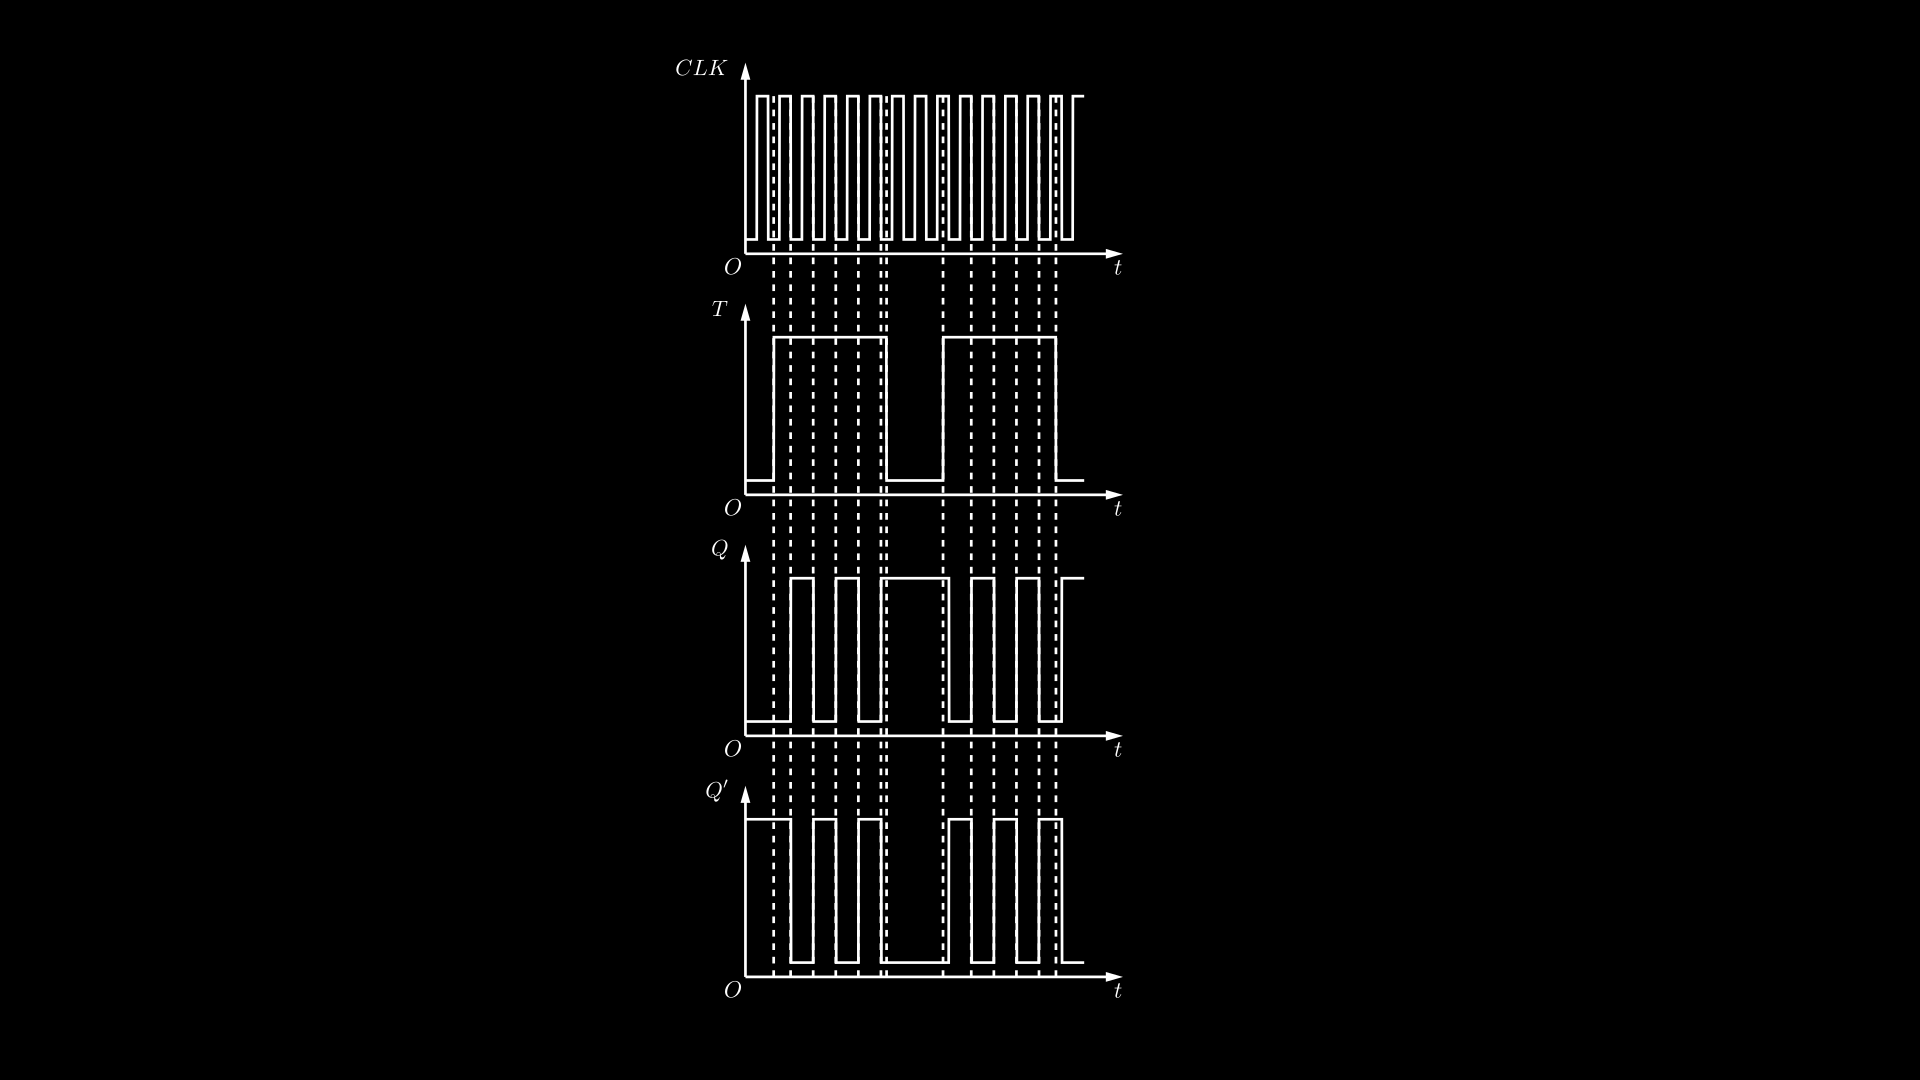

In [15]:
%%manim -qh -v WARNING -s work3
from digitalElectronic import get_wave_fig,draw_dashlines,tab2func
from digitalElectronic.device import  JKFF



class work3(Scene):
   def construct(self):
      
      fclk = lambda x: (np.sin(2*np.pi*x) < 0)
      fT = lambda x: (1.25<x<6.25 or 8.75<x<13.75)
      x_range=[0, 15, 0.01]
      x,Q,Qi = JKFF.draw_wave(x_range,fT,fT,fclk)
      
      clk_g,clk = get_wave_fig(fclk,x_range)      
      T_g,T = get_wave_fig(fT,x_range)
      Q_g,Q = get_wave_fig(tab2func(x,Q),x_range)
      Qi_g,Qi = get_wave_fig(tab2func(x,Qi),x_range)
      
      clk_g.to_edge(UP)
      T_g.next_to(clk_g,DOWN)
      Q_g.next_to(T_g,DOWN)
      Qi_g.next_to(Q_g,DOWN)
      
      y_label_clk = clk[0].get_y_axis_label(MathTex("CLK").scale(1.5*0.22), edge=UL, direction=LEFT, buff=0.5*0.22)
      y_label_T = T[0].get_y_axis_label(MathTex("T").scale(1.5*0.22), edge=UL, direction=LEFT, buff=0.5*0.22)
      y_label_Q = Q[0].get_y_axis_label(MathTex("Q").scale(1.5*0.22), edge=UL, direction=LEFT, buff=0.5*0.22)
      y_label_Qi = Qi[0].get_y_axis_label(MathTex("Q'").scale(1.5*0.22), edge=UL, direction=LEFT, buff=0.5*0.22)
      
      labels = VGroup(y_label_clk,y_label_T,y_label_Q,y_label_Qi)
      
      dsls = draw_dashlines(clk[0],Qi[0],(1.25,2,3,4,5,6,6.25,8.75,10,11,12,13,13.75))
      
      self.add(clk_g,T_g,Q_g,Qi_g,labels,dsls)